<a href="https://colab.research.google.com/github/ibonetc/DataAnalytics_Text/blob/master/NLP%20/Procesamiento_de_Lenguaje_Natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pyLDAvis

# Procesamiento del lenguaje natural
El procesamiento del lenguaje natural tiene varias tareas y varios pasos

# Ejemplo
Vamos a usar como ejemplo un pdf que esté público en internet.

Por ejemplo:

## Cargar pdf

In [6]:
!pip install PyMuPDF

In [7]:
import fitz
from urllib.request import Request, urlopen
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [8]:
url='https://www.grupoexito.com.co/es/informe-de-sostenibilidad-grupo-exito-2019.pdf'

In [9]:
res = requests.get(url)
doc = fitz.open(stream = res.content, filetype="pdf")

In [10]:
doc.get_page_text(pno=2)

'Análisis de materialidad\nEl análisis de materialidad que fue presentado en el 2019 nos permitió \n-\nciales, ambientales y económicos. \nLos programas que lideramos desde la estrategia de sostenibilidad, \nestán alineados con el análisis de materialidad y los asuntos priorizados \npor los diferentes grupos de interés –clientes, proveedores, líderes de \nopinión, medios de comunicación, empleados, Junta Directiva, alta di-\nrección y Comité ejecutivo, con los análisis técnicos del sector y con la \nreferenciación de los líderes del comercio en el mundo.\nImportancia de los impactos económicos, ambientales y sociales\n Económicos  \n Ambientales  \n Sociales\nInﬂuencia en las evaluaciones y decisiones de los grupos de interés\nBaja\nBaja\nMedia\nMedia\nAlta\nAlta\n19\n12\n6\n2\n17\n8\n10\n3\n1\n15\n18\n20\n16\n11\n4\n14\n9\n7\n5\n13\nINFORME INTEGRADO 2019\n'

In [11]:
num_pages=len(doc)
print(f"Número de páginas: {num_pages}")

Número de páginas: 70


## Extraer contenido del pdf
Después de cargar el pdf

In [12]:
text_content = [page.get_text() for page in doc]

In [13]:
text_content

['INFORME INTEGRADO 2019\n',
 'Sostenibilidad\nNuestra estrategia sostenible contribuy\nuy\nu e \nal desarrollo social, al crecimiento de nuestros \nproveedores, a la protección del ambiente, \na la promoción de hábitos saludables \ny al bienestar de nuestros colaboradores.\n',
 'Análisis de materialidad\nEl análisis de materialidad que fue presentado en el 2019 nos permitió \n-\nciales, ambientales y económicos. \nLos programas que lideramos desde la estrategia de sostenibilidad, \nestán alineados con el análisis de materialidad y los asuntos priorizados \npor los diferentes grupos de interés –clientes, proveedores, líderes de \nopinión, medios de comunicación, empleados, Junta Directiva, alta di-\nrección y Comité ejecutivo, con los análisis técnicos del sector y con la \nreferenciación de los líderes del comercio en el mundo.\nImportancia de los impactos económicos, ambientales y sociales\n Económicos  \n Ambientales  \n Sociales\nInﬂuencia en las evaluaciones y decisiones de los gr

Unir el texto, sin cambios de líneas

In [14]:
text_data="\n".join(text_content)
text_data

'INFORME INTEGRADO 2019\n\nSostenibilidad\nNuestra estrategia sostenible contribuy\nuy\nu e \nal desarrollo social, al crecimiento de nuestros \nproveedores, a la protección del ambiente, \na la promoción de hábitos saludables \ny al bienestar de nuestros colaboradores.\n\nAnálisis de materialidad\nEl análisis de materialidad que fue presentado en el 2019 nos permitió \n-\nciales, ambientales y económicos. \nLos programas que lideramos desde la estrategia de sostenibilidad, \nestán alineados con el análisis de materialidad y los asuntos priorizados \npor los diferentes grupos de interés –clientes, proveedores, líderes de \nopinión, medios de comunicación, empleados, Junta Directiva, alta di-\nrección y Comité ejecutivo, con los análisis técnicos del sector y con la \nreferenciación de los líderes del comercio en el mundo.\nImportancia de los impactos económicos, ambientales y sociales\n Económicos  \n Ambientales  \n Sociales\nInﬂuencia en las evaluaciones y decisiones de los grupos de

## WordCloud

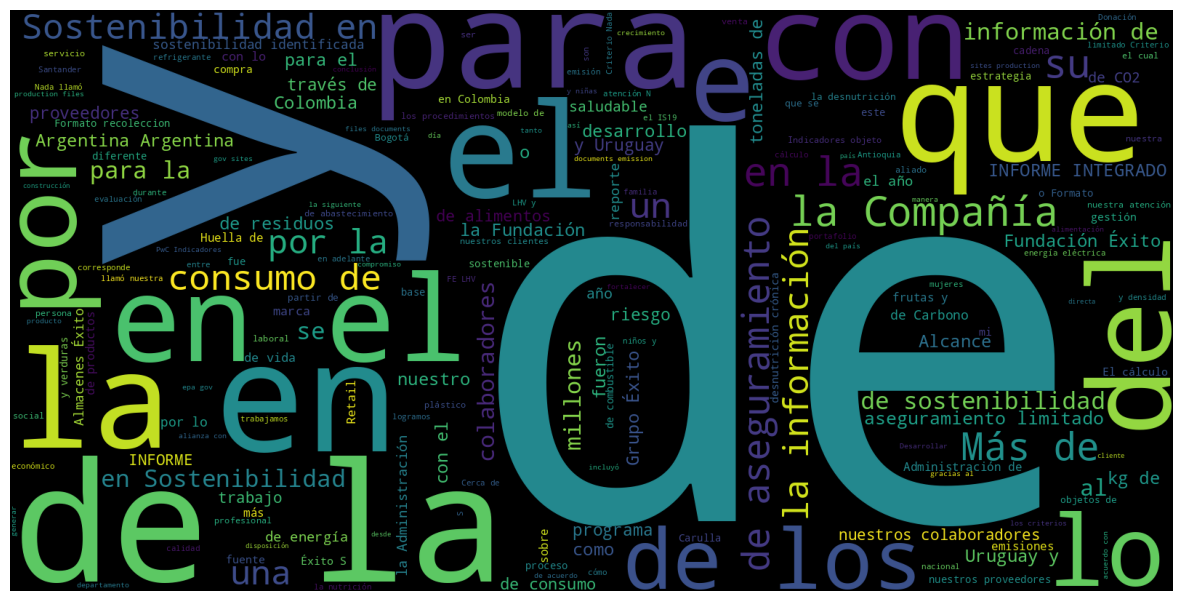

In [15]:
wordcloud = WordCloud(width=1600, height=800).generate(text_data)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [16]:
#wordcloud.to_file('wordcloud.png')

(-0.5, 1599.5, 799.5, -0.5)

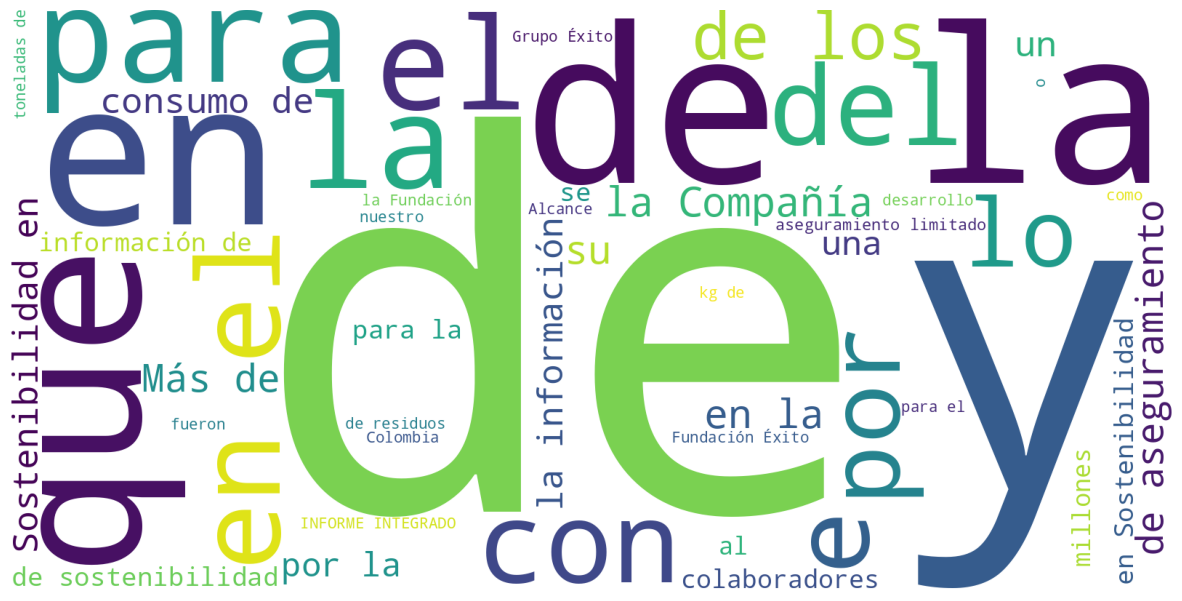

In [17]:
wordcloud = (WordCloud(width=1600, height=800,
                      background_color="white",
                      max_words=50)
                      .generate(text_data))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")

In [18]:
df_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
df_freq

,0
de,1.000000
y,0.621302
de la,0.325444
en,0.280079
que,0.230769
para,0.216963
la,0.213018
el,0.205128
en el,0.163708
con,0.159763


<Axes: >

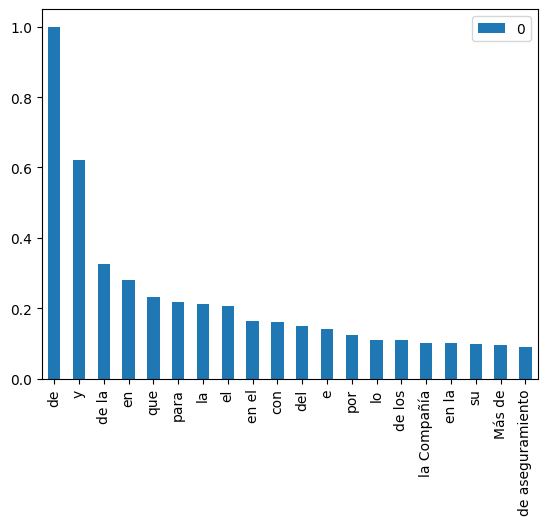

In [19]:
df_freq = df_freq.head(20)
df_freq.plot.bar()

## Limpieza de texto

Hay varios pasos para hacer limpieza de texto.

Después de extraer el texto se debe:
- Limpiar texto con expresiones regulares
- Quitar stopwords
- Quitar palabras que no tienen significado en ese texto específico

Para visualizar las cómo se van comportando las palabras del texto vamos a usar WordClouds

### Uso de expresiones regulares

In [20]:
import re

In [21]:
df=pd.DataFrame(text_content,columns=['text'])
df

,text
0,INFORME INTEGRADO 2019\n
1,Sostenibilidad\nNuestra estrategia sostenible ...
2,Análisis de materialidad\nEl análisis de mater...
3,1\n2\n12\n3\n13\n5\n4\n15\n6\n7\n17\n8\n18\n19...
4,Sostenibilidad a partir \nde una estrategia c...
...,...
65,PwC \n7 \n \n \n \nIndicadores objetos \nde as...
66,PwC \n8 \n \n \n \nIndicadores objetos \nde as...
67,PwC \n9 \n \n \n \nIndicadores objetos \nde as...
68,PwC \n10 \n \n \n \nIndicadores objetos \nde a...


In [22]:
df['text'][68]

'PwC \n10 \n \n \n \nIndicadores objetos \nde aseguramiento \nlimitado \n \nCriterio \nNada llamó \nnuestra atención \n(\uf0fc) – N/A \n \nb. Residuos peligrosos: corresponde a la cantidad total de residuos peligrosos que fueron \ngenerados por la Compañía (servicios de Retail, Cedi y HQ) y fueron tratados para su adecuada \ndisposición final. Esta información se incluye en el documento “CONSOLIDADO RESIDUOS \n2019.xlsx”, el cual es administrado por el Área de Gestión Ambiental de la Compañía y es \nsoportado por los certificados de disposición final de este tipo de residuos. \nc. Aceite de cocina usado: corresponde a la cantidad total de aceite de cocina usado que fue \ngenerado por la Compañía (servicios de Retail y Cedi) y fue tratado para su adecuada disposición \nfinal. Esta información se incluye en el documento “CONSOLIDADO RESIDUOS 2019.xlsx”, el \ncual es administrado por el Área de Gestión Ambiental de la Compañía y es soportado por los \ncertificados de disposición final de 

#### Buscar url o ficheros en el texto

In [23]:
re.findall(
    '(((?:http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+(?:[-.]{1}\w+)*\.[a-z]{2,5}(?:\/)?(?:(?:[^\s@])*(?:\/)?)*))',
    text_data
    )

[('comproagro.com', 'comproagro.com'),
 ('www.grupoexito.com.co)', 'www.grupoexito.com.co)'),
 ('www.pwc.com/co', 'www.pwc.com/co'),
 ('éxito.docx”', 'éxito.docx”'),
 ('Exito.xlsx”.', 'Exito.xlsx”.'),
 ('carbono-Mantenimiento-2019.xlsx”', 'carbono-Mantenimiento-2019.xlsx”'),
 ('2019.xlsx”,', '2019.xlsx”,'),
 ('http://www.upme.gov.co/Calculadora_Emisiones/',
  'http://www.upme.gov.co/Calculadora_Emisiones/'),
 ('calculadora.html', 'calculadora.html'),
 ('http://www.upme.gov.co/Calculadora_Emisiones/',
  'http://www.upme.gov.co/Calculadora_Emisiones/'),
 ('calculadora.html', 'calculadora.html'),
 ('http://www.upme.gov.co/Calculadora_Emisiones/',
  'http://www.upme.gov.co/Calculadora_Emisiones/'),
 ('calculadora.html', 'calculadora.html'),
 ('http://www.upme.gov.co/Calculadora_Emisiones/',
  'http://www.upme.gov.co/Calculadora_Emisiones/'),
 ('calculadora.html', 'calculadora.html'),
 ('éxito.docx”', 'éxito.docx”'),
 ('Exito.xlsx”.', 'Exito.xlsx”.'),
 ('http://www.upme.gov.co/Calculadora_E

Buscar emails en el texto

In [24]:
p= re.compile(r'(\b[a-z]+[a-z0-9]*[-._]?[a-z0-9]+@[a-z]+(?:[.][a-z]+[_]?[a-z0-9]+)*[.][a-z]{2,})',re.MULTILINE)
p.findall(text_data)

[]

In [25]:
p.findall('Este es un ejemplo isis.bonet@eia.edu.co y otros como xx@gmail.com')

['isis.bonet@eia.edu.co', 'xx@gmail.com']

### Uso de expresiones regulares para limpiar texto
Los textos siempre tienen ruido que nos impiden hacer un buen análisis del mismo. Por eso, lo primero que normalmente hacemos es una limpieza del texto eliminando de él todo aquello que no influye en entender de qué trata.

1.   Eliminamos las URL
2.   Eliminamos correos electrónicos
2.   Eliminamos hashtags
2.   Eliminamos menciones que se suelen hacer con @Nombre
2.   Eliminamos los números
2.   Eliminamos signos de puntuación


In [26]:
from string import punctuation

In [27]:
list(punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

patternURLEMAIL=r'
((\w+\.)*\w+@(\w+\.)+\w+)
|
(
  (http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*
  )'

In [52]:
def  clean_text(df, text_field):
  patternURLEMAIL=r'(\w+[.]?\w+@(\w+\.)+\w+)|((http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*)'
  patternHashtagMention=r'(@\w+)|(#\w+)'
  #Primero convertimos a minúscula
  df[text_field] = df[text_field].str.lower()
  # Utilizamos las expresiones regulares anteriores sobre URL, email, hashtag y menciones para quitarlos, si son tweets
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternURLEMAIL,'', elem))
  # Utilizamos una expresión regular para eliminar los hashtag y las menciones con @ para tweets
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternHashtagMention,'', elem))
  # Utilizamos una expresión regular también para eliminar los signos de mayor que y menor que
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(\&gt\;)|(\&lt\;)','', elem))
  # Utilizamos una expresión regular también para eliminar a.m y p.m cuando mencionan horas
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(a\.m)|(p\.m)','', elem))
  # Utilizamos una expresión regular también para eliminar los números
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\d+','', elem))
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[|]','', elem))
  ## Eliminar signos de puntuación '[!#?,.:";]'
  non_words = list(punctuation)
  non_words.extend(['¿', '¡', '‘', '’'])
  df[text_field] = df[text_field].apply(lambda elem: ''.join([c for c in elem if c not in non_words]))
  ## Sustituir espacios de más
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\s+',' ', elem))
  return df

In [56]:
df_clean = clean_text(df.copy(), 'text')
df_clean.head(6)

,text
0,informe integrado
1,sostenibilidad nuestra estrategia sostenible c...
2,análisis de materialidad el análisis de materi...
3,temas estratégicos democratización de estilos...
4,sostenibilidad a partir de una estrategia corp...
5,riesgos de sostenibilidad les riesgos estratég...


## StopWords

La biblioteca Natural Language Toolkit (NLTK) tiene funciones para eliminar stopwords en diferentes idiomas.

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
stop

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [57]:
df_clean['text_clean_stop'] = df_clean['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_clean.head()

,text,text_clean_stop
0,informe integrado,informe integrado
1,sostenibilidad nuestra estrategia sostenible c...,sostenibilidad estrategia sostenible contribuy...
2,análisis de materialidad el análisis de materi...,análisis materialidad análisis materialidad pr...
3,temas estratégicos democratización de estilos...,temas estratégicos democratización estilos vid...
4,sostenibilidad a partir de una estrategia corp...,sostenibilidad partir estrategia corporativa c...


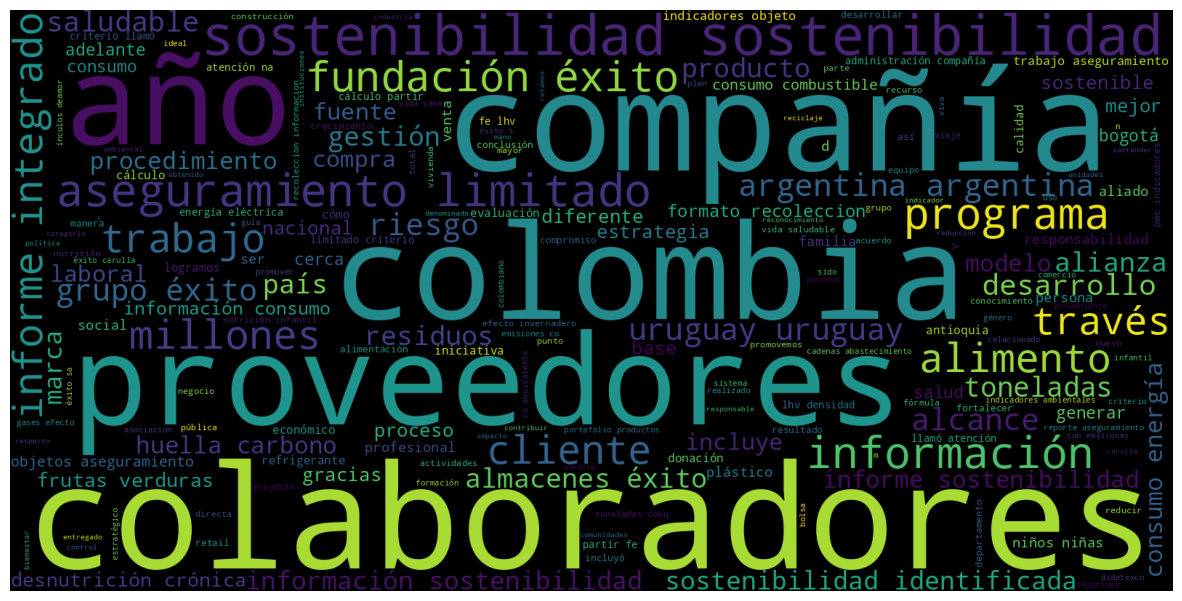

In [58]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = ' '.join(txt for txt in df_clean.text_clean_stop)
wordcloud = WordCloud(width=1600, height=800).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [36]:
wordcloud.words_

{'colaboradores': 1.0,
 'compañía': 0.9148936170212766,
 'colombia': 0.8297872340425532,
 'proveedores': 0.7446808510638298,
 'año': 0.7446808510638298,
 'sostenibilidad sostenibilidad': 0.7446808510638298,
 'aseguramiento limitado': 0.6808510638297872,
 'información': 0.6382978723404256,
 'programa': 0.6170212765957447,
 'fundación éxito': 0.574468085106383,
 'millones': 0.5319148936170213,
 'alimento': 0.5319148936170213,
 'informe integrado': 0.5319148936170213,
 'cliente': 0.5106382978723404,
 'trabajo': 0.5106382978723404,
 'través': 0.48936170212765956,
 'argentina argentina': 0.48936170212765956,
 'riesgo': 0.46808510638297873,
 'alcance': 0.46808510638297873,
 'grupo éxito': 0.46808510638297873,
 'uruguay uruguay': 0.46808510638297873,
 'desarrollo': 0.425531914893617,
 'saludable': 0.40425531914893614,
 'toneladas': 0.3829787234042553,
 'gestión': 0.3617021276595745,
 'país': 0.3617021276595745,
 'producto': 0.3617021276595745,
 'alianza': 0.3617021276595745,
 'residuos': 0.36

In [39]:
re.findall(r'((\b\w+) \2)',text)

[('baja baja', 'baja'),
 ('media media', 'media'),
 ('alta alta', 'alta'),
 ('alimentos alimentos', 'alimentos'),
 ('santander santander', 'santander'),
 ('año año', 'año'),
 ('m m', 'm'),
 ('s s', 's'),
 ('km km', 'km'),
 ('mujeres mujeres', 'mujeres'),
 ('hombres hombres', 'hombres'),
 ('años años', 'años'),
 ('girardot girardot', 'girardot'),
 ('sostenibilidad sostenibilidad', 'sostenibilidad'),
 ('sostenibilidad sostenibilidad', 'sostenibilidad'),
 ('sostenibilidad sostenibilidad', 'sostenibilidad'),
 ('sostenibilidad sostenibilidad', 'sostenibilidad'),
 ('sostenibilidad sostenibilidad', 'sostenibilidad'),
 ('sostenibilidad sostenibilidad', 'sostenibilidad'),
 ('sostenibilidad sostenibilidad', 'sostenibilidad'),
 ('sostenibilidad sostenibilidad', 'sostenibilidad'),
 ('sostenibilidad sostenibilidad', 'sostenibilidad'),
 ('sostenibilidad sostenibilidad', 'sostenibilidad'),
 ('sostenibilidad sostenibilidad', 'sostenibilidad'),
 ('sostenibilidad sostenibilidad', 'sostenibilidad'),
 ('s

In [47]:
re.sub(r'(\b\w+)( \1)+',r'\1','uruguay uruguay uruguay por ejemplo exito exito')

'uruguay por ejemplo exito'

In [50]:
df_clean

,text,content
0,informe integrado,informe integrado
1,sostenibilidad nuestra estrategia sostenible c...,sostenibilidad estrategia sostenible contribuy...
2,análisis de materialidad el análisis de materi...,análisis materialidad análisis materialidad pr...
3,temas estratégicos democratización de estilos...,temas estratégicos democratización estilos vid...
4,sostenibilidad a partir de una estrategia corp...,sostenibilidad partir estrategia corporativa c...
...,...,...
65,pwc indicadores objetos de aseguramiento limit...,pwc indicadores objetos aseguramiento limitado...
66,pwc indicadores objetos de aseguramiento limit...,pwc indicadores objetos aseguramiento limitado...
67,pwc indicadores objetos de aseguramiento limit...,pwc indicadores objetos aseguramiento limitado...
68,pwc indicadores objetos de aseguramiento limit...,pwc indicadores objetos aseguramiento limitado...


In [59]:
df_clean['text_clean_stop']=df_clean['text_clean_stop'].apply(lambda x: re.sub(r'\uf0fc','',x))
df_clean['text_clean_stop']=df_clean['text_clean_stop'].apply(lambda x: re.sub(r'–','',x))
df_clean['text_clean_stop']=df_clean['text_clean_stop'].apply(lambda x: re.sub(r'\b\d+ \d+','',x))
df_clean['text_clean_stop']=df_clean['text_clean_stop'].apply(lambda x: re.sub(r'ínculos deamor','vínculos amor',x))
df_clean['text_clean_stop']=df_clean['text_clean_stop'].apply(lambda x: re.sub(r'éxito s ','éxitos ',x))
df_clean['text_clean_stop']=df_clean['text_clean_stop'].apply(lambda x: re.sub(r'(\b\w+)( \1)+',r'\1',x))

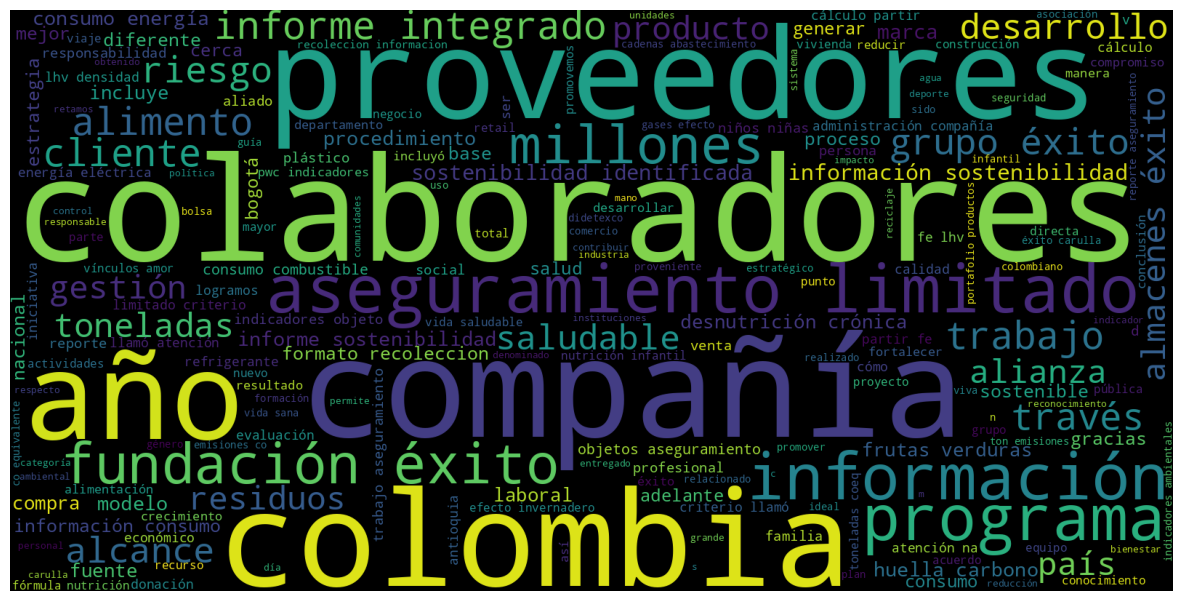

In [60]:
text = ' '.join(txt for txt in df_clean.text_clean_stop)
wordcloud = WordCloud(width=1600, height=800).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

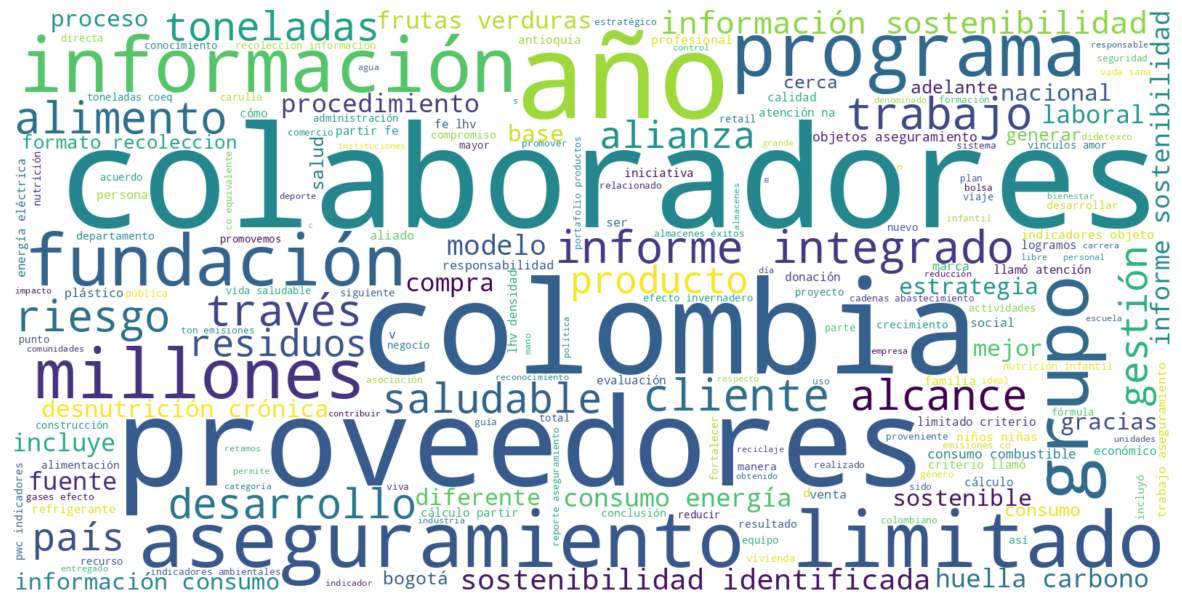

In [61]:
stop.extend(['pr','éxito', 'compañía'])
df_clean['text_clean_stop'] = df_clean['text_clean_stop'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
text = ' '.join(txt for txt in df_clean.text_clean_stop)
wordcloud = WordCloud(background_color="white", contour_width=5, contour_color='steelblue', width=1600, height=800)
wordcloud.generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Tokenización

Es el proceso de dividir el texto en tokens (palabras, bigramas, secuencias...)

In [62]:
import itertools
import collections
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [63]:
df_clean['tokens'] = df_clean['text_clean_stop'].apply(lambda x: word_tokenize(x))
df_clean.head()

,text,text_clean_stop,tokens
0,informe integrado,informe integrado,"[informe, integrado]"
1,sostenibilidad nuestra estrategia sostenible c...,sostenibilidad estrategia sostenible contribuy...,"[sostenibilidad, estrategia, sostenible, contr..."
2,análisis de materialidad el análisis de materi...,análisis materialidad análisis materialidad pr...,"[análisis, materialidad, análisis, materialida..."
3,temas estratégicos democratización de estilos...,temas estratégicos democratización estilos vid...,"[temas, estratégicos, democratización, estilos..."
4,sostenibilidad a partir de una estrategia corp...,sostenibilidad partir estrategia corporativa c...,"[sostenibilidad, partir, estrategia, corporati..."


In [64]:
df_clean['tokens_clean']=df_clean['tokens']
df_clean['tokens_clean']=df_clean['tokens_clean'].apply(lambda text: [word for word in text if word.isalnum() and len(word)>1])

In [65]:
df_clean

,text,text_clean_stop,tokens,tokens_clean
0,informe integrado,informe integrado,"[informe, integrado]","[informe, integrado]"
1,sostenibilidad nuestra estrategia sostenible c...,sostenibilidad estrategia sostenible contribuy...,"[sostenibilidad, estrategia, sostenible, contr...","[sostenibilidad, estrategia, sostenible, contr..."
2,análisis de materialidad el análisis de materi...,análisis materialidad análisis materialidad pr...,"[análisis, materialidad, análisis, materialida...","[análisis, materialidad, análisis, materialida..."
3,temas estratégicos democratización de estilos...,temas estratégicos democratización estilos vid...,"[temas, estratégicos, democratización, estilos...","[temas, estratégicos, democratización, estilos..."
4,sostenibilidad a partir de una estrategia corp...,sostenibilidad partir estrategia corporativa c...,"[sostenibilidad, partir, estrategia, corporati...","[sostenibilidad, partir, estrategia, corporati..."
...,...,...,...,...
65,pwc indicadores objetos de aseguramiento limit...,pwc indicadores objetos aseguramiento limitado...,"[pwc, indicadores, objetos, aseguramiento, lim...","[pwc, indicadores, objetos, aseguramiento, lim..."
66,pwc indicadores objetos de aseguramiento limit...,pwc indicadores objetos aseguramiento limitado...,"[pwc, indicadores, objetos, aseguramiento, lim...","[pwc, indicadores, objetos, aseguramiento, lim..."
67,pwc indicadores objetos de aseguramiento limit...,pwc indicadores objetos aseguramiento limitado...,"[pwc, indicadores, objetos, aseguramiento, lim...","[pwc, indicadores, objetos, aseguramiento, lim..."
68,pwc indicadores objetos de aseguramiento limit...,pwc indicadores objetos aseguramiento limitado...,"[pwc, indicadores, objetos, aseguramiento, lim...","[pwc, indicadores, objetos, aseguramiento, lim..."


## Frecuencia de palabras
Después de quitar los stopwords, procemos a calcular la frecuencia de palablas

In [66]:
all_words = list(itertools.chain(*df_clean['tokens_clean']))

In [67]:
counts_words = collections.Counter(all_words)
mostcommon_words=counts_words.most_common(35)
mostcommon_words

[('información', 65),
 ('colaboradores', 58),
 ('aseguramiento', 51),
 ('consumo', 50),
 ('informe', 49),
 ('sostenibilidad', 45),
 ('colombia', 39),
 ('residuos', 38),
 ('proveedores', 35),
 ('grupo', 35),
 ('millones', 35),
 ('trabajo', 34),
 ('fundación', 32),
 ('limitado', 32),
 ('desarrollo', 31),
 ('kg', 31),
 ('emisiones', 30),
 ('través', 29),
 ('toneladas', 29),
 ('cálculo', 29),
 ('alimentos', 27),
 ('clientes', 26),
 ('año', 26),
 ('integrado', 25),
 ('vida', 25),
 ('almacenes', 24),
 ('alcance', 24),
 ('criterio', 23),
 ('productos', 22),
 ('energía', 22),
 ('país', 21),
 ('atención', 21),
 ('sostenible', 20),
 ('indicadores', 20),
 ('retail', 19)]

## Frecuencia de bigramas

In [68]:
from nltk import bigrams
import networkx as nx
from nltk.util import ngrams

In [69]:
df_clean['text_clean']=df_clean['tokens_clean'].apply(lambda tokens: ' '.join(t for t in tokens))

In [70]:
df_clean

,text,text_clean_stop,tokens,tokens_clean,text_clean
0,informe integrado,informe integrado,"[informe, integrado]","[informe, integrado]",informe integrado
1,sostenibilidad nuestra estrategia sostenible c...,sostenibilidad estrategia sostenible contribuy...,"[sostenibilidad, estrategia, sostenible, contr...","[sostenibilidad, estrategia, sostenible, contr...",sostenibilidad estrategia sostenible contribuy...
2,análisis de materialidad el análisis de materi...,análisis materialidad análisis materialidad pr...,"[análisis, materialidad, análisis, materialida...","[análisis, materialidad, análisis, materialida...",análisis materialidad análisis materialidad pr...
3,temas estratégicos democratización de estilos...,temas estratégicos democratización estilos vid...,"[temas, estratégicos, democratización, estilos...","[temas, estratégicos, democratización, estilos...",temas estratégicos democratización estilos vid...
4,sostenibilidad a partir de una estrategia corp...,sostenibilidad partir estrategia corporativa c...,"[sostenibilidad, partir, estrategia, corporati...","[sostenibilidad, partir, estrategia, corporati...",sostenibilidad partir estrategia corporativa c...
...,...,...,...,...,...
65,pwc indicadores objetos de aseguramiento limit...,pwc indicadores objetos aseguramiento limitado...,"[pwc, indicadores, objetos, aseguramiento, lim...","[pwc, indicadores, objetos, aseguramiento, lim...",pwc indicadores objetos aseguramiento limitado...
66,pwc indicadores objetos de aseguramiento limit...,pwc indicadores objetos aseguramiento limitado...,"[pwc, indicadores, objetos, aseguramiento, lim...","[pwc, indicadores, objetos, aseguramiento, lim...",pwc indicadores objetos aseguramiento limitado...
67,pwc indicadores objetos de aseguramiento limit...,pwc indicadores objetos aseguramiento limitado...,"[pwc, indicadores, objetos, aseguramiento, lim...","[pwc, indicadores, objetos, aseguramiento, lim...",pwc indicadores objetos aseguramiento limitado...
68,pwc indicadores objetos de aseguramiento limit...,pwc indicadores objetos aseguramiento limitado...,"[pwc, indicadores, objetos, aseguramiento, lim...","[pwc, indicadores, objetos, aseguramiento, lim...",pwc indicadores objetos aseguramiento limitado...


In [71]:
text = ' '.join(txt for txt in df_clean.text_clean)
text

'informe integrado sostenibilidad estrategia sostenible contribuy uy desarrollo social crecimiento proveedores protección ambiente promoción hábitos saludables bienestar colaboradores análisis materialidad análisis materialidad presentado permitió ciales ambientales económicos programas lideramos estrategia sostenibilidad alineados análisis materialidad asuntos priorizados diferentes grupos interés clientes proveedores líderes opinión medios comunicación empleados junta directiva alta di rección comité ejecutivo análisis técnicos sector referenciación líderes comercio mundo importancia impactos económicos ambientales sociales económicos ambientales sociales inﬂuencia evaluaciones decisiones grupos interés baja media alta informe integrado temas estratégicos democratización estilos vida saludable ofrecer cliente portafolio productos guros calidad incluye alimentos necesidades especiales orgánicos saludables así mismo proveer información facilite toma decisiones consumidores atracción re

In [72]:
terms_bigram = [list(nltk.bigrams(t)) for t in df_clean.tokens_clean if t!=[]]

In [73]:
bigramsList = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigramsList)
bigram_counts.most_common(15)

[(('aseguramiento', 'limitado'), 32),
 (('informe', 'integrado'), 25),
 (('información', 'sostenibilidad'), 17),
 (('sostenibilidad', 'identificada'), 17),
 (('huella', 'carbono'), 15),
 (('informe', 'sostenibilidad'), 15),
 (('desnutrición', 'crónica'), 14),
 (('frutas', 'verduras'), 14),
 (('consumo', 'energía'), 14),
 (('información', 'consumo'), 13),
 (('formato', 'recoleccion'), 13),
 (('objetos', 'aseguramiento'), 12),
 (('niños', 'niñas'), 11),
 (('trabajo', 'aseguramiento'), 11),
 (('indicadores', 'objetos'), 10)]

In [74]:
bigram_df = pd.DataFrame(bigram_counts.most_common(50),columns=['bigram', 'count'])

In [75]:
bigram_df

,bigram,count
0,"(aseguramiento, limitado)",32
1,"(informe, integrado)",25
2,"(información, sostenibilidad)",17
3,"(sostenibilidad, identificada)",17
4,"(huella, carbono)",15
5,"(informe, sostenibilidad)",15
6,"(desnutrición, crónica)",14
7,"(frutas, verduras)",14
8,"(consumo, energía)",14
9,"(información, consumo)",13


In [76]:
d = bigram_df.set_index('bigram').T.to_dict('records')

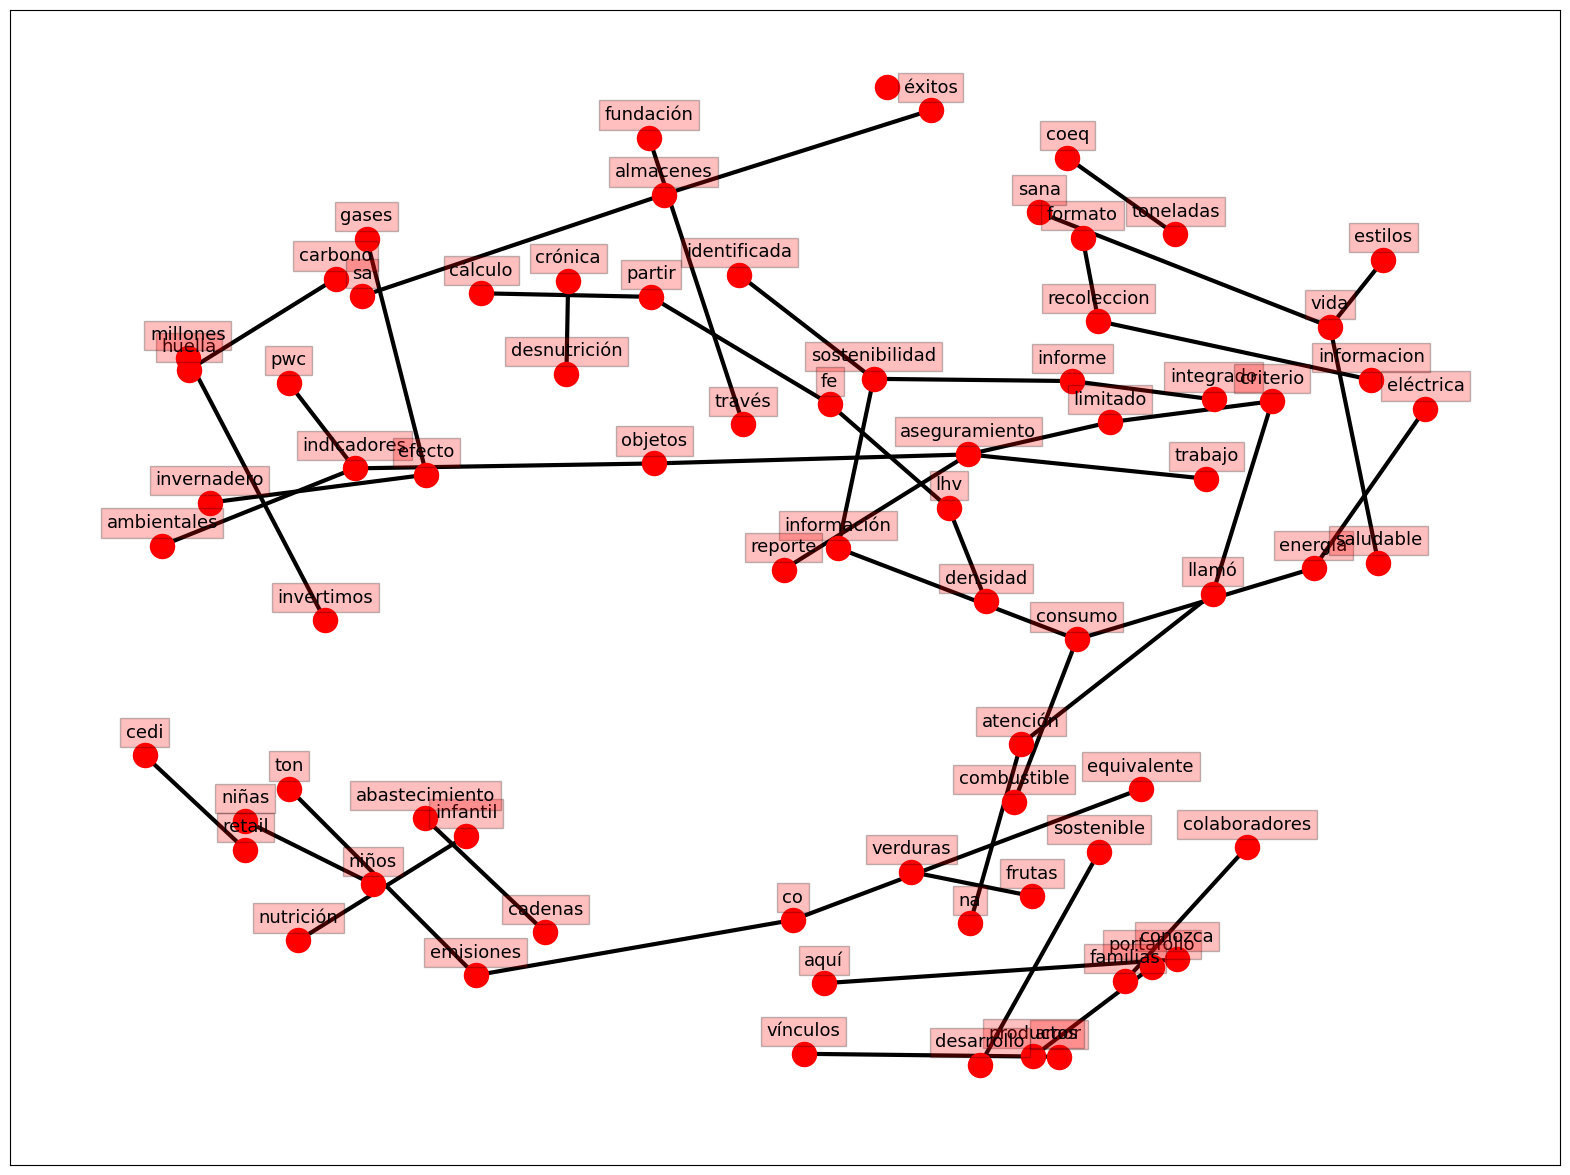

In [77]:
G = nx.Graph()
# Conecciones entre los nodos
for k, v in d[0].items():
  G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("", weight=100)
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(G, k=2)
nx.draw_networkx(G, pos,font_size=16,width=3,edge_color='black',node_color='red',with_labels = False,ax=ax)
for key, value in pos.items():
  x, y = value[0], value[1]+.035
  ax.text(x, y, s=key, bbox=dict(facecolor='red', alpha=0.25),horizontalalignment='center', fontsize=13)
plt.show()

# Lematización (Lemmatization)
Es la acción de identificar en el texto, dada una forma flexionada, el lema correspondiente.

Se entiende como forma flexionada de una palabra, el plural, femenino, o conjugación de un verbo.

El lema es la forma que representa todas las formas flexionadas de una misma palabra.

Por ejemplo, el lema de una conjugación de un verbo es el verbo en infinitivo. De un sustantivo en plural, es el sustantivo en singular y masculino.

In [78]:
import spacy
!python -m spacy download es_core_news_sm # Descarga el modelo del lenguaje

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 33.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [79]:
import es_core_news_sm
nlp = es_core_news_sm.load()

La descripción de las diferentes abreviaturas la puede encontrar en: https://spacy.io/api/annotation#pos-tagging

In [80]:
print(df_clean.text_clean[10])
d=nlp(df_clean.text_clean[10])
t=[[tok.text,tok.lemma_,tok.pos_,tok.ent_type_] for tok in d]
t

recuperación excedentes agropecuarios través reagro antioquia mano saciar recuperaron toneladas personas marco fundación evitar pérdida alimentos reagro nacional recuperaron toneladas alimentos donados gracias aporte grupo grupo retail país alimentos entrega bancos alimentos través fundación aproximadamente toneladas alimentos donados bancos alimentos instituciones gestión bancos alimentos la fundación contribuido niños niñas alimenten mejor madres reciban mejor información nutrición infantil leonardo mengual wayú informe integrado


[['recuperación', 'recuperación', 'NOUN', ''],
 ['excedentes', 'excedente', 'ADJ', ''],
 ['agropecuarios', 'agropecuario', 'ADJ', ''],
 ['través', 'través', 'ADP', ''],
 ['reagro', 'reagro', 'PROPN', ''],
 ['antioquia', 'antioquia', 'NOUN', 'LOC'],
 ['mano', 'mano', 'ADJ', ''],
 ['saciar', 'saciar', 'ADJ', ''],
 ['recuperaron', 'recuperar', 'VERB', ''],
 ['toneladas', 'tonelada', 'NOUN', ''],
 ['personas', 'persona', 'NOUN', ''],
 ['marco', 'marco', 'NOUN', ''],
 ['fundación', 'fundación', 'VERB', ''],
 ['evitar', 'evitar', 'VERB', ''],
 ['pérdida', 'pérdida', 'NOUN', ''],
 ['alimentos', 'alimento', 'NOUN', ''],
 ['reagro', 'reagro', 'PROPN', ''],
 ['nacional', 'nacional', 'ADJ', ''],
 ['recuperaron', 'recuperar', 'VERB', ''],
 ['toneladas', 'tonelada', 'NOUN', ''],
 ['alimentos', 'alimento', 'ADJ', ''],
 ['donados', 'donado', 'ADJ', ''],
 ['gracias', 'gracias', 'SCONJ', ''],
 ['aporte', 'aporte', 'VERB', ''],
 ['grupo', 'grupo', 'NOUN', ''],
 ['grupo', 'grupo', 'PROPN', ''],
 ['retail

Por ejemplo, detectar los sustantivos en un texto

In [81]:
for noun in d.noun_chunks:
  print(noun.text)

recuperación excedentes agropecuarios
reagro antioquia mano
toneladas personas
pérdida alimentos reagro nacional
toneladas alimentos
grupo grupo retail país alimentos
bancos alimentos
través fundación
aproximadamente toneladas alimentos donados bancos alimentos
gestión
bancos
la fundación contribuido
mejor madres
mejor información nutrición infantil
leonardo
mengual wayú


In [82]:
[[tok.lemma_] for tok in d]

[['recuperación'],
 ['excedente'],
 ['agropecuario'],
 ['través'],
 ['reagro'],
 ['antioquia'],
 ['mano'],
 ['saciar'],
 ['recuperar'],
 ['tonelada'],
 ['persona'],
 ['marco'],
 ['fundación'],
 ['evitar'],
 ['pérdida'],
 ['alimento'],
 ['reagro'],
 ['nacional'],
 ['recuperar'],
 ['tonelada'],
 ['alimento'],
 ['donado'],
 ['gracias'],
 ['aporte'],
 ['grupo'],
 ['grupo'],
 ['retail'],
 ['país'],
 ['alimentos'],
 ['entregar'],
 ['banco'],
 ['alimento'],
 ['través'],
 ['fundación'],
 ['aproximadamente'],
 ['tonelada'],
 ['alimento'],
 ['donado'],
 ['banco'],
 ['alimento'],
 ['institución'],
 ['gestión'],
 ['bancos'],
 ['alimento'],
 ['el'],
 ['fundación'],
 ['contribuido'],
 ['niños'],
 ['niñas'],
 ['alimentir'],
 ['mejor'],
 ['madre'],
 ['recibir'],
 ['mejor'],
 ['información'],
 ['nutrición'],
 ['infantil'],
 ['leonardo'],
 ['mengual'],
 ['wayú'],
 ['informe'],
 ['integrado']]

In [83]:
df_clean['lemmas'] = df_clean.text_clean.apply(lambda text: [tok.lemma_ for tok in nlp(text)])

In [84]:
df_clean[['text_clean','lemmas']].head()

,text_clean,lemmas
0,informe integrado,"[informir, integrado]"
1,sostenibilidad estrategia sostenible contribuy...,"[sostenibilidad, estrategia, sostenible, contr..."
2,análisis materialidad análisis materialidad pr...,"[análisis, materialidad, análisis, materialida..."
3,temas estratégicos democratización estilos vid...,"[tema, estratégico, democratización, estilo, v..."
4,sostenibilidad partir estrategia corporativa c...,"[sostenibilidad, partir, estrategia, corporati..."


In [85]:
allWords=[]
for l in df_clean.lemmas:
  allWords.extend(l)
wordDist = nltk.FreqDist(allWords)
wordDist.most_common(15)

[('información', 65),
 ('colaborador', 58),
 ('aseguramiento', 51),
 ('consumo', 50),
 ('sostenibilidad', 45),
 ('emisión', 41),
 ('proveedor', 37),
 ('grupo', 37),
 ('informe', 36),
 ('año', 36),
 ('colombia', 35),
 ('millón', 35),
 ('residuo', 35),
 ('criterio', 35),
 ('trabajo', 34)]

Algo interesante de este módulo es si usamos la frase completa, es capaz de hacer el análisis completo de la oración y podemos visualizar el gráfico de dependencias.

La lista de depndencias pueden verla aquí:
https://universaldependencies.org/u/dep/index.html

In [86]:
ejemploOracion = nlp('El curso de analítica de datos de la Universidad EIA de la profesora Isis tiene un grupo de estudiantes muy brillantes')
spacy.displacy.render(ejemploOracion, style='dep', jupyter=True, options={'distance': 90})

Identificación de la entidades en el texto:

En este ejemplo reconoce Persona: Isis y Organización: Universidad EIA

In [87]:
[(e,  e.label_) for e in ejemploOracion.ents]

[(Universidad EIA, 'ORG'), (Isis, 'PER')]

# Radicalización (Stemming)
Stremming es el proceso de llevar las palabras a su forma raíz.

Después de dividido el texto en palabras, pasamos a hacer el stemming. Para hacerlo en idioma español debemos usar la librería SnowballStemmer, que permite varios lenguajes además del inglés.

In [88]:
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer ## Para poder hacerlo con idiomas diferentes al inglés

In [89]:
stemmer_spanish = SnowballStemmer("spanish")

In [90]:
df_clean['tokens_stem'] = df_clean['tokens_clean'].apply(lambda text: [s for s in [stemmer_spanish.stem(i) for i in text] if s.isalpha() and len(s) > 1])

In [91]:
df_clean[['tokens_clean','tokens_stem']].head(5)

,tokens_clean,tokens_stem
0,"[informe, integrado]","[inform, integr]"
1,"[sostenibilidad, estrategia, sostenible, contr...","[sostenibil, estrategi, sosten, contribuy, uy,..."
2,"[análisis, materialidad, análisis, materialida...","[analisis, material, analisis, material, prese..."
3,"[temas, estratégicos, democratización, estilos...","[tem, estrateg, democratiz, estil, vid, salud,..."
4,"[sostenibilidad, partir, estrategia, corporati...","[sostenibil, part, estrategi, corpor, constru,..."


In [ ]:
path='/content/drive/MyDrive/Analitics_Esp'
df_clean.to_csv(path+'informeSostenibilidad.csv', encoding='utf-8-sig')

In [ ]:
#df = pd.read_csv(path+'informeSostenibilidad.csv', encoding='utf-8-sig')

# Bag of Words

In [92]:
import gensim
from gensim import corpora
import numpy as np

In [93]:
words=[]
for w in df_clean.lemmas:
  words.append(w)

In [94]:
words

[['informir', 'integrado'],
 ['sostenibilidad',
  'estrategia',
  'sostenible',
  'contribuy',
  'uy',
  'desarrollo',
  'social',
  'crecimiento',
  'proveedor',
  'protección',
  'ambiente',
  'promoción',
  'hábito',
  'saludable',
  'bienestar',
  'colaborador'],
 ['análisis',
  'materialidad',
  'análisis',
  'materialidad',
  'presentado',
  'permitir',
  'cial',
  'ambiental',
  'económico',
  'programa',
  'liderar',
  'estrategia',
  'sostenibilidad',
  'alinear',
  'análisis',
  'materialidad',
  'asuntos',
  'priorizado',
  'diferente',
  'grupo',
  'interés',
  'client',
  'proveedor',
  'líder',
  'opinión',
  'medios',
  'comunicación',
  'empleados',
  'junta',
  'directivo',
  'alto',
  'di',
  'rección',
  'comité',
  'ejecutivo',
  'análisis',
  'técnico',
  'sector',
  'referenciación',
  'líder',
  'comercio',
  'mundo',
  'importancia',
  'impacto',
  'económico',
  'ambiental',
  'social',
  'económico',
  'ambiental',
  'social',
  'inﬂuenciar',
  'evaluación',
 

In [95]:
dic=corpora.Dictionary(words)

In [96]:
bow_corpus = [dic.doc2bow(w) for w in words]

Crear un modelo para clasificar el texto

In [97]:
lda_model = gensim.models.LdaMulticore(bow_corpus,num_topics = 4, id2word = dic, passes = 20)
lda_model.show_topics()

[(0,
  '0.022*"consumo" + 0.013*"tonelada" + 0.012*"información" + 0.011*"energía" + 0.009*"formato" + 0.008*"emisión" + 0.008*"recoleccion" + 0.008*"combustible" + 0.006*"alimento" + 0.006*"retail"'),
 (1,
  '0.015*"aseguramiento" + 0.013*"sostenibilidad" + 0.011*"información" + 0.009*"limitado" + 0.008*"trabajo" + 0.007*"fundación" + 0.007*"año" + 0.007*"riesgo" + 0.007*"identificado" + 0.006*"almacén"'),
 (2,
  '0.020*"colaborador" + 0.010*"residuo" + 0.008*"criterio" + 0.006*"información" + 0.006*"millón" + 0.005*"fuente" + 0.005*"familia" + 0.005*"laboral" + 0.005*"documento" + 0.005*"año"'),
 (3,
  '0.009*"kg" + 0.009*"saludable" + 0.008*"emisión" + 0.008*"millón" + 0.007*"vida" + 0.007*"cálculo" + 0.006*"proveedor" + 0.006*"cliente" + 0.006*"desarrollo" + 0.006*"fruta"')]

In [98]:
import pyLDAvis.gensim_models

In [99]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.026443 -0.065439       1        1  33.126480
1      0.135658  0.064668       2        1  29.822733
2      0.010668 -0.079744       3        1  21.019279
0     -0.119883  0.080515       4        1  16.031508, topic_info=             Term       Freq      Total Category  logprob  loglift
86        consumo  36.000000  36.000000  Default  30.0000  30.0000
4     colaborador  44.000000  44.000000  Default  29.0000  29.0000
476      tonelada  20.000000  20.000000  Default  28.0000  28.0000
888       energía  15.000000  15.000000  Default  27.0000  27.0000
13      saludable  22.000000  22.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
328       alianza   3.964170  12.624313   Topic4  -5.6257   0.6723
191           año   4.448914  28.123071   Topic4  -5.5103  -0.0133
195      colombia   3.769685  28.023587   Topic4  -5.6760  -0.1754
1876    siguiente   3.639345  13.528969   Topic4  -5.7112   0.5176
1844      cálculo   3.643051  23.969253   Topic4  -5.7102  -0.0533

[269 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1311      3  0.901247   académico
418       1  0.140496  accionista
418       2  0.842975  accionista
738       2  0.693555    adelante
738       3  0.198159    adelante
...     ...       ...         ...
649       3  0.901250         wow
898       4  0.943552      yellow
2003      1  0.167857        área
2003      3  0.839285        área
1736      2  0.906542       éxito

[437 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])